In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_df['Policy Start Date'] = pd.to_datetime(train_df['Policy Start Date'])

In [4]:
test_df['Policy Start Date'] = pd.to_datetime(test_df['Policy Start Date'])

In [5]:
train_df['Policy_Start_Date_year'] = train_df['Policy Start Date'].dt.year
train_df['Policy_Start_Date_month'] = train_df['Policy Start Date'].dt.month
train_df['Policy_Start_Date_day'] = train_df['Policy Start Date'].dt.day

In [6]:
test_df['Policy_Start_Date_year'] = test_df['Policy Start Date'].dt.year
test_df['Policy_Start_Date_month'] = test_df['Policy Start Date'].dt.month
test_df['Policy_Start_Date_day'] = test_df['Policy Start Date'].dt.day

In [7]:
train_df.drop(columns=['Policy Start Date'], inplace=True)

In [8]:
test_df.drop(columns=['Policy Start Date'], inplace=True)

In [9]:
train_df.drop(columns=['id'], inplace=True)

In [10]:
test_df.drop(columns=['id'], inplace=True)

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 22 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   Age                      1181295 non-null  float64
 1   Gender                   1200000 non-null  object 
 2   Annual Income            1155051 non-null  float64
 3   Marital Status           1181471 non-null  object 
 4   Number of Dependents     1090328 non-null  float64
 5   Education Level          1200000 non-null  object 
 6   Occupation               841925 non-null   object 
 7   Health Score             1125924 non-null  float64
 8   Location                 1200000 non-null  object 
 9   Policy Type              1200000 non-null  object 
 10  Previous Claims          835971 non-null   float64
 11  Vehicle Age              1199994 non-null  float64
 12  Credit Score             1062118 non-null  float64
 13  Insurance Duration       1199999 non-null 

In [12]:
num_cols = train_df.select_dtypes(include=['number'])
num_cols

,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount,Policy_Start_Date_year,Policy_Start_Date_month,Policy_Start_Date_day
0,19.0,10049.0,1.0,22.598761,2.0,17.0,372.0,5.0,2869.0,2023,12,23
1,39.0,31678.0,3.0,15.569731,1.0,12.0,694.0,2.0,1483.0,2023,6,12
2,23.0,25602.0,3.0,47.177549,1.0,14.0,NaN,3.0,567.0,2023,9,30
3,21.0,141855.0,2.0,10.938144,1.0,0.0,367.0,1.0,765.0,2024,6,12
4,21.0,39651.0,1.0,20.376094,0.0,8.0,598.0,4.0,2022.0,2021,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1199995,36.0,27316.0,0.0,13.772907,NaN,5.0,372.0,3.0,1303.0,2023,5,3
1199996,54.0,35786.0,NaN,11.483482,NaN,10.0,597.0,4.0,821.0,2022,9,10
1199997,19.0,51884.0,0.0,14.724469,0.0,19.0,NaN,6.0,371.0,2021,5,25
1199998,55.0,NaN,1.0,18.547381,1.0,7.0,407.0,4.0,596.0,2021,9,19


In [13]:
cat_cols = train_df.select_dtypes(include=['object'])
cat_cols

,Gender,Marital Status,Education Level,Occupation,Location,Policy Type,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
0,Female,Married,Bachelor's,Self-Employed,Urban,Premium,Poor,No,Weekly,House
1,Female,Divorced,Master's,NaN,Rural,Comprehensive,Average,Yes,Monthly,House
2,Male,Divorced,High School,Self-Employed,Suburban,Premium,Good,Yes,Weekly,House
3,Male,Married,Bachelor's,NaN,Rural,Basic,Poor,Yes,Daily,Apartment
4,Male,Single,Bachelor's,Self-Employed,Rural,Premium,Poor,Yes,Weekly,House
...,...,...,...,...,...,...,...,...,...,...
1199995,Female,Married,Master's,Unemployed,Urban,Premium,Poor,No,Daily,Apartment
1199996,Male,Divorced,Master's,Self-Employed,Rural,Comprehensive,Poor,No,Weekly,Apartment
1199997,Male,Divorced,Master's,NaN,Suburban,Basic,Good,No,Monthly,Condo
1199998,Male,Single,PhD,NaN,Suburban,Premium,Poor,No,Daily,Apartment


In [14]:
cols_with_missing_values = [col for col in train_df.columns if train_df[col].isna().sum() > 0]

In [15]:
for col in cols_with_missing_values:
    print(f'{col}: {train_df[col].isna().sum()} (dtype:{train_df[col].dtype})', end='\n')

Age: 18705 (dtype:float64)
Annual Income: 44949 (dtype:float64)
Marital Status: 18529 (dtype:object)
Number of Dependents: 109672 (dtype:float64)
Occupation: 358075 (dtype:object)
Health Score: 74076 (dtype:float64)
Previous Claims: 364029 (dtype:float64)
Vehicle Age: 6 (dtype:float64)
Credit Score: 137882 (dtype:float64)
Insurance Duration: 1 (dtype:float64)
Customer Feedback: 77824 (dtype:object)


In [16]:
X = train_df.drop(columns=['Premium Amount'])

In [17]:
y = train_df['Premium Amount']

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [20]:
X_train.columns

Index(['Age', 'Gender', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Education Level', 'Occupation', 'Health Score',
       'Location', 'Policy Type', 'Previous Claims', 'Vehicle Age',
       'Credit Score', 'Insurance Duration', 'Customer Feedback',
       'Smoking Status', 'Exercise Frequency', 'Property Type',
       'Policy_Start_Date_year', 'Policy_Start_Date_month',
       'Policy_Start_Date_day'],
      dtype='object')

In [21]:
for i, col in enumerate(X_train.columns):
    print(f'{col} index is: {i}')

Age index is: 0
Gender index is: 1
Annual Income index is: 2
Marital Status index is: 3
Number of Dependents index is: 4
Education Level index is: 5
Occupation index is: 6
Health Score index is: 7
Location index is: 8
Policy Type index is: 9
Previous Claims index is: 10
Vehicle Age index is: 11
Credit Score index is: 12
Insurance Duration index is: 13
Customer Feedback index is: 14
Smoking Status index is: 15
Exercise Frequency index is: 16
Property Type index is: 17
Policy_Start_Date_year index is: 18
Policy_Start_Date_month index is: 19
Policy_Start_Date_day index is: 20


In [22]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

In [23]:
from sklearn import set_config
set_config(display='diagram')

In [24]:
mean_imputer = Pipeline(
    [
        ('mean_impute', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ]
)

In [25]:
median_imputer = Pipeline(
    [
        ('median_impute', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]
)

In [56]:
scaler = Pipeline(
    [
        ('std_scaling', StandardScaler())
    ]
)

In [26]:
one_hot_enc = Pipeline(
    [
        ('most_freq_encode', SimpleImputer(strategy='most_frequent')),
        ('one_hot_encode', OneHotEncoder(handle_unknown='ignore', drop='first'))
    ]
)

In [27]:
education_order = ["High School", "Bachelor's", "Master's", "PhD"]
policy_order = ["Basic", "Comprehensive", "Premium"]

In [28]:
# ordinal_encoder = Pipeline(
#     [
#         ('most_freq_impute', SimpleImputer(strategy='most_frequent')),
#         ('ordinal_encode', OrdinalEncoder(categories=[education_order, policy_order], handle_unknown='use_encoded_value'))
#     ]
# )

In [29]:
preprocessor = ColumnTransformer(
    [
        ('mean_impute', mean_imputer, [0, 4, 10, 11, 13]),
        ('median_impute', median_imputer, [2, 7, 12]),
        ('one_hot_encode', one_hot_enc, [1, 3, 5, 6, 8, 9, 14, 15, 16, 17])
    ],
    remainder='passthrough'
)

In [60]:
preprocessor_scaled = ColumnTransformer(
    [
        ('mean_impute', mean_imputer, [0, 4, 10, 11, 13]),
        ('median_impute', median_imputer, [2, 7, 12]),
        ('one_hot_encode', one_hot_enc, [1, 3, 5, 6, 8, 9, 14, 15, 16, 17]),
        ('scale', scaler, [0, 2, 4, 7, 10, 11, 12, 13])
    ],
    remainder='passthrough'
)

In [55]:
preprocessor_scaled.fit_transform(X_train, y_train)

array([[ 5.09775790e-01,  7.34379898e-01, -1.22190149e+00, ...,
         2.02200000e+03,  1.10000000e+01,  4.00000000e+00],
       [-5.32686308e-01,  1.47463689e+00, -2.70406805e-16, ...,
         2.02100000e+03,  1.00000000e+00,  2.40000000e+01],
       [ 1.10546842e+00, -7.46134090e-01, -4.09750586e-03, ...,
         2.02200000e+03,  1.00000000e+01,  1.30000000e+01],
       ...,
       [ 1.37467898e-01, -1.48639108e+00, -1.22190149e+00, ...,
         2.02300000e+03,  9.00000000e+00,  3.00000000e+01],
       [ 5.84237369e-01, -1.48639108e+00, -1.22190149e+00, ...,
         2.01900000e+03,  1.00000000e+01,  1.10000000e+01],
       [ 1.17993000e+00, -5.87709599e-03, -2.70406805e-16, ...,
         2.02200000e+03,  1.00000000e+00,  2.50000000e+01]])

In [30]:
pipe = Pipeline(
    [
        ('preprocessing', preprocessor),
        ('model', LinearRegression())
    ]
)

In [61]:
pipe_2 = Pipeline(
    [
        ('preprocessing', preprocessor_scaled),
        ('model', LinearRegression())
    ]
)

In [ ]:
# pipe_2.fit(X_train, y_train)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [32]:
y_pred = pipe.predict(X_test)

In [33]:
from sklearn.metrics import root_mean_squared_log_error
rmsle = root_mean_squared_log_error(y_test, y_pred)
rmsle

1.1698190441893355

In [34]:
test_df

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,...,Vehicle Age,Credit Score,Insurance Duration,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Policy_Start_Date_year,Policy_Start_Date_month,Policy_Start_Date_day
0,28.0,Female,2310.0,NaN,4.0,Bachelor's,Self-Employed,7.657981,Rural,Basic,...,19.0,NaN,1.0,Poor,Yes,Weekly,House,2023,6,4
1,31.0,Female,126031.0,Married,2.0,Master's,Self-Employed,13.381379,Suburban,Premium,...,14.0,372.0,8.0,Good,Yes,Rarely,Apartment,2024,4,22
2,47.0,Female,17092.0,Divorced,0.0,PhD,Unemployed,24.354527,Urban,Comprehensive,...,16.0,819.0,9.0,Average,Yes,Monthly,Condo,2023,4,5
3,28.0,Female,30424.0,Divorced,3.0,PhD,Self-Employed,5.136225,Suburban,Comprehensive,...,3.0,770.0,5.0,Poor,Yes,Daily,House,2023,10,25
4,24.0,Male,10863.0,Divorced,2.0,High School,Unemployed,11.844155,Suburban,Premium,...,14.0,755.0,7.0,Average,No,Weekly,House,2021,11,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799995,50.0,Female,38782.0,Married,1.0,Bachelor's,NaN,14.498639,Rural,Premium,...,8.0,309.0,2.0,Average,Yes,Daily,Condo,2021,7,9
799996,NaN,Female,73462.0,Single,0.0,Master's,NaN,8.145748,Rural,Basic,...,0.0,NaN,2.0,Good,No,Daily,Apartment,2023,3,28
799997,26.0,Female,35178.0,Single,0.0,Master's,Employed,6.636583,Urban,Comprehensive,...,10.0,NaN,6.0,Poor,No,Monthly,Apartment,2019,9,30
799998,34.0,Female,45661.0,Single,3.0,Master's,NaN,15.937248,Urban,Premium,...,17.0,467.0,7.0,Average,No,Weekly,Condo,2022,5,9


In [35]:
test_predictions = pipe.predict(test_df)
test_predictions

array([1087.93849434, 1066.15450591, 1063.21030046, ..., 1100.80622909,
       1158.15993088, 1097.26766247])

In [36]:
test = pd.read_csv('test.csv')
test

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
0,1200000,28.0,Female,2310.0,NaN,4.0,Bachelor's,Self-Employed,7.657981,Rural,Basic,NaN,19.0,NaN,1.0,2023-06-04 15:21:39.245086,Poor,Yes,Weekly,House
1,1200001,31.0,Female,126031.0,Married,2.0,Master's,Self-Employed,13.381379,Suburban,Premium,NaN,14.0,372.0,8.0,2024-04-22 15:21:39.224915,Good,Yes,Rarely,Apartment
2,1200002,47.0,Female,17092.0,Divorced,0.0,PhD,Unemployed,24.354527,Urban,Comprehensive,NaN,16.0,819.0,9.0,2023-04-05 15:21:39.134960,Average,Yes,Monthly,Condo
3,1200003,28.0,Female,30424.0,Divorced,3.0,PhD,Self-Employed,5.136225,Suburban,Comprehensive,1.0,3.0,770.0,5.0,2023-10-25 15:21:39.134960,Poor,Yes,Daily,House
4,1200004,24.0,Male,10863.0,Divorced,2.0,High School,Unemployed,11.844155,Suburban,Premium,NaN,14.0,755.0,7.0,2021-11-26 15:21:39.259788,Average,No,Weekly,House
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799995,1999995,50.0,Female,38782.0,Married,1.0,Bachelor's,NaN,14.498639,Rural,Premium,NaN,8.0,309.0,2.0,2021-07-09 15:21:39.184157,Average,Yes,Daily,Condo
799996,1999996,NaN,Female,73462.0,Single,0.0,Master's,NaN,8.145748,Rural,Basic,2.0,0.0,NaN,2.0,2023-03-28 15:21:39.250151,Good,No,Daily,Apartment
799997,1999997,26.0,Female,35178.0,Single,0.0,Master's,Employed,6.636583,Urban,Comprehensive,NaN,10.0,NaN,6.0,2019-09-30 15:21:39.132191,Poor,No,Monthly,Apartment
799998,1999998,34.0,Female,45661.0,Single,3.0,Master's,NaN,15.937248,Urban,Premium,2.0,17.0,467.0,7.0,2022-05-09 15:21:39.253660,Average,No,Weekly,Condo


In [37]:
result = pd.DataFrame(
    {
        'id': test['id'],
        'Premium Amount': test_predictions
    }
)

In [38]:
result

,id,Premium Amount
0,1200000,1087.938494
1,1200001,1066.154506
2,1200002,1063.210300
3,1200003,1040.157849
4,1200004,1088.287696
...,...,...
799995,1999995,1147.089500
799996,1999996,1092.823290
799997,1999997,1100.806229
799998,1999998,1158.159931


In [39]:
result.to_csv('submission.csv', index=False)

## Trying log transformation on target var to improve results

In [40]:
y_train

790711     2362.0
1107843    2957.0
1166226    1130.0
716647     3030.0
278240     1314.0
            ...  
110268      538.0
259178      819.0
131932      403.0
671155      542.0
121958     2619.0
Name: Premium Amount, Length: 900000, dtype: float64

In [41]:
y_train_log = np.log1p(y_train)

In [42]:
y_train_log

790711     7.767687
1107843    7.992269
1166226    7.030857
716647     8.016648
278240     7.181592
             ...   
110268     6.289716
259178     6.709304
131932     6.001415
671155     6.297109
121958     7.870930
Name: Premium Amount, Length: 900000, dtype: float64

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Premium Amount', ylabel='Count'>

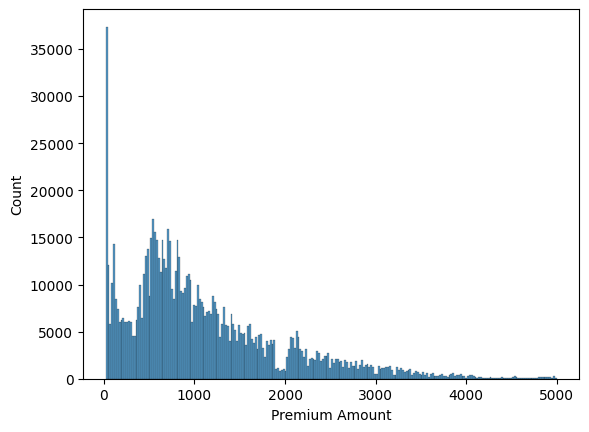

In [43]:
sns.histplot(y_train)

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Premium Amount', ylabel='Count'>

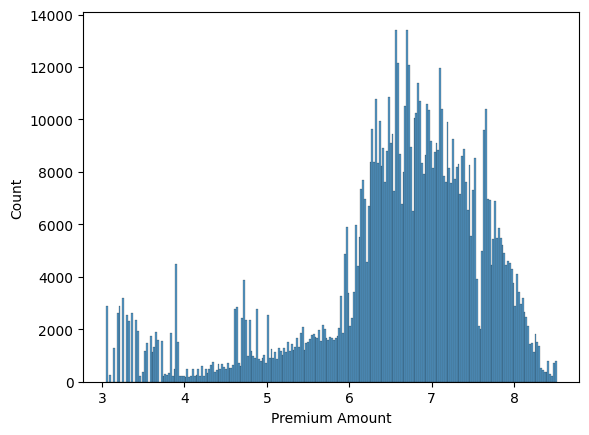

In [44]:
sns.histplot(y_train_log)

In [45]:
pipe.fit(X_train, y_train_log)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('mean_impute',
                                                  Pipeline(steps=[('mean_impute',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  [0, 4, 10, 11, 13]),
                                                 ('median_impute',
                                                  Pipeline(steps=[('median_impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  [2, 7, 12]),
                                                 ('one_hot_encode',
                                                  Pipeline(steps=[('most_freq_encode',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one_hot_encode',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  [1, 3, 5, 6, 8, 9, 14, 15, 16,
                                                   17])])),
                ('model', LinearRegression())])

In [46]:
y_pred_log = pipe.predict(X_test)
y_pred_log

array([6.66479051, 6.64976752, 6.74142013, ..., 6.77873833, 6.51406545,
       6.56658425])

In [47]:
rmsle_log = root_mean_squared_log_error(y_test, np.expm1(y_pred_log))
rmsle_log

1.0906466532443717

In [48]:
test_predictions_log = pipe.predict(test_df)
test_predictions_log

array([6.65078423, 6.35620389, 6.52492591, ..., 6.57162227, 6.65905335,
       6.60645778])

In [49]:
result_log = pd.DataFrame({'id': test['id'], 'Premium Amount': np.expm1(test_predictions_log)})
result_log

,id,Premium Amount
0,1200000,772.390602
1,1200001,575.055431
2,1200002,680.929248
3,1200003,637.119890
4,1200004,717.105383
...,...,...
799995,1999995,824.899361
799996,1999996,638.224885
799997,1999997,713.528062
799998,1999998,778.812381


In [50]:
result_log.to_csv('target_log_submission.csv', index=False)